In [1]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math

In [31]:
def grayscale(img):   
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def gaussian_blur(img, kernel_size):    
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

def find_countours(thresholded):
    image, countours, hierarchies = cv2.findContours(thresholded, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    return countours

def draw_contours(image, cont, color=(255, 0, 0), thikness=2):
    cv2.drawContours(image, [cont], -1, color, thikness) 

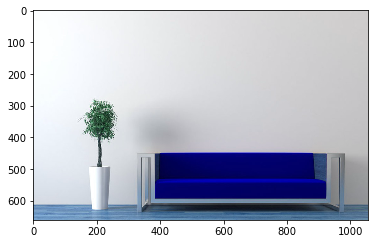

In [3]:
image = cv2.imread('wall.jpg', cv2.IMREAD_COLOR)

plt.imshow(image)
plt.show()

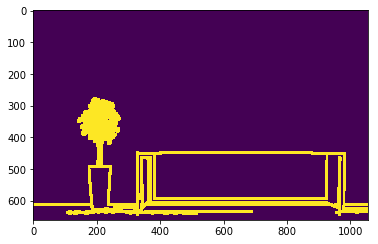

In [32]:
im = grayscale(image)
#im = gaussian_blur(im, 5)
edges = canny(im, 0, 255)
dilated = cv2.dilate(edges, None, iterations=4)
#im = gaussian_blur(im, 5)
plt.imshow(dilated)
plt.show()

1


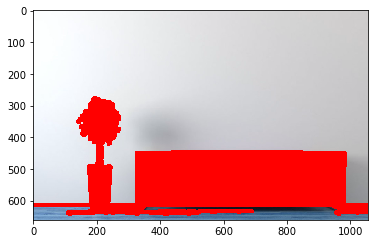

In [38]:
result = dilated.copy()

contours = find_countours(result)
print (len(contours))

result = image.copy()
for cont in contours:
    draw_contours(result, cont,thikness=4 )
    cv2.fillPoly(result,[cont], color=(255,0,0))

plt.imshow(result)
plt.show()